In [1]:
data <- read.csv("C:\\Users\\hp\\Downloads\\cerealspga05.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

print(str(data))

'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" "Cracklin'_Oat_Bran" ...
 $ mfr     : chr  "N" "K" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 70 50 110 120 120 120 110 110 110 ...
 $ protein : int  4 4 4 3 3 3 3 2 2 2 ...
 $ fat     : int  1 1 0 3 1 1 5 2 2 0 ...
 $ sodium  : int  130 260 140 140 200 210 15 200 180 125 ...
 $ fiber   : num  10 9 14 4 6 5 2 1 1.5 1 ...
 $ carbo   : num  5 7 8 10 11 14 8 14 10.5 11 ...
 $ sugars  : int  6 5 0 7 14 12 8 8 10 14 ...
 $ potass  : int  280 320 330 160 260 240 135 -1 70 30 ...
 $ vitamins: int  25 25 25 25 25 25 0 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 2 3 3 1 2 ...
 $ weight  : num  1 1 1 1 1.33 1.33 1 1 1 1 ...
 $ cups    : num  0.33 0.33 0.5 0.5 0.67 0.75 1 0.75 0.75 1 ...
 $ rating  : num  68.4 59.4 93.7 40.4 37.8 ...
NULL


In [2]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

df = data[c(-1,-2,-3,-13,-14,-15,-16)]

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.2.5
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [3]:
head(df)

calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
70,4,1,130,10,5,6,280,25
70,4,1,260,9,7,5,320,25
50,4,0,140,14,8,0,330,25
110,3,3,140,4,10,7,160,25
120,3,1,200,6,11,14,260,25
120,3,1,210,5,14,12,240,25


In [4]:
output <- kmeans(df, centers = 10)
output

K-means clustering with 10 clusters of sizes 9, 5, 15, 3, 12, 8, 8, 3, 7, 4

Cluster means:
    calories  protein       fat     sodium      fiber     carbo    sugars
1   95.55556 3.000000 0.8888889   3.333333  2.5222222 13.555556  3.111111
2  118.00000 3.000000 0.6000000 210.000000  5.0000000 13.400000 11.400000
3  112.66667 1.733333 1.0666667 202.000000  0.5000000 14.433333  9.000000
4   63.33333 4.000000 0.6666667 176.666667 11.0000000  6.666667  3.666667
5  110.83333 3.083333 1.5833333 143.333333  2.5833333 13.666667  6.750000
6  107.50000 2.500000 0.6250000 282.500000  0.5000000 19.875000  3.375000
7  108.75000 2.625000 1.1250000 215.000000  2.4375000 16.562500  6.000000
8   66.66667 1.666667 0.0000000  15.000000  0.3333333 11.333333  5.000000
9  108.57143 1.714286 0.5714286 109.285714  0.7142857 13.000000 11.142857
10 115.00000 2.500000 1.0000000 185.000000  1.5000000 18.500000  5.250000
      potass   vitamins
1  110.55556  11.111111
2  222.00000  40.000000
3   42.93333  25.00000

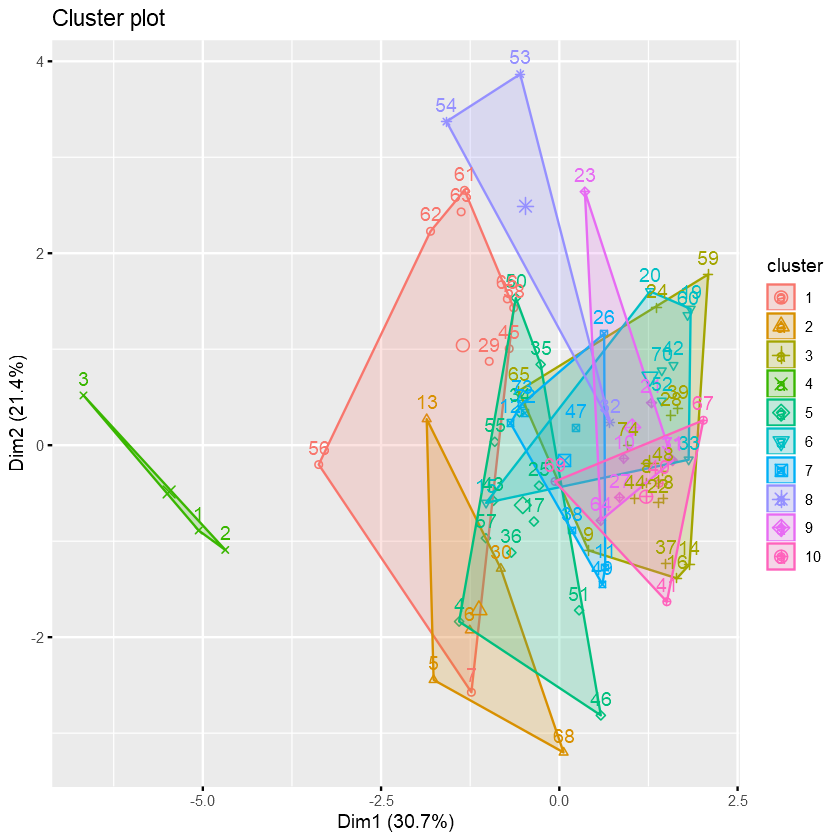

In [5]:
fviz_cluster(output, data = df)

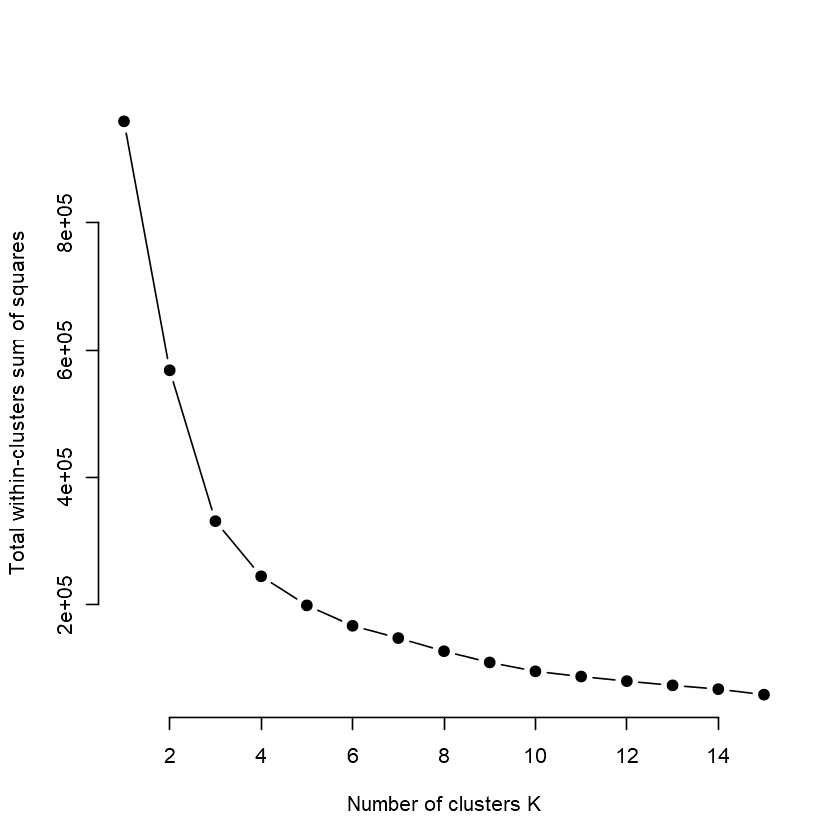

In [6]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [7]:
x <- fviz_cluster(output, data = df)
cl <- x$data
#head(cl$cluster==1)

subVal <- subset(cl, cl$cluster==2)

head(subVal)

,name,x,y,coord,cluster
5,5,-1.76328831,-2.4454644,9.089482,2
6,6,-1.25580940,-1.9282638,5.295259,2
13,13,-1.86039675,0.2724057,3.535281,2
30,30,-0.82084235,-1.2854265,2.326103,2
68,68,0.05991468,-3.2014773,10.253047,2


In [8]:
subVal

,name,x,y,coord,cluster
5,5,-1.76328831,-2.4454644,9.089482,2
6,6,-1.25580940,-1.9282638,5.295259,2
13,13,-1.86039675,0.2724057,3.535281,2
30,30,-0.82084235,-1.2854265,2.326103,2
68,68,0.05991468,-3.2014773,10.253047,2


In [9]:
df2 <- cbind(data$name,cl$name,cl$x,cl$y,cl$coord,cl$cluster)
#df2
df3 <- as.data.frame(df2)
#str(df3)
#head(df3)
subset(df3, V6 == 3)

,V1,V2,V3,V4,V5,V6
8,Almond_Delight,73,1.22062912170712,-0.394705567816432,1.64572793802479,3
9,Apple_Cinnamon_Cheerios,74,0.408608814929627,-1.09605455905568,1.36829676006493,3
14,Cap'n'Crunch,6,1.82496380471481,-1.24429599183969,4.87876540382748,3
16,Cinnamon_Toast_Crunch,8,1.64934584004686,-1.387389967492,4.64519262197733,3
18,Cocoa_Puffs,10,1.4584876196224,-0.556969681911216,2.4374013631601,3
22,Count_Chocula,15,1.38952261672524,-0.597796647030918,2.28813393359237,3
24,Crispix,17,1.3629974354444,1.43147984289853,3.90689654965279,3
28,Frosted_Flakes,21,1.5642429315364,0.310810879012922,2.54345935137437,3
37,Honey_Graham_Ohs,31,1.49075262654395,-1.23563733402579,3.74914301478603,3
39,Honey-comb,33,1.66277097794199,0.379738909197915,2.909008964245,3


Too few points to calculate an ellipse
Too few points to calculate an ellipse


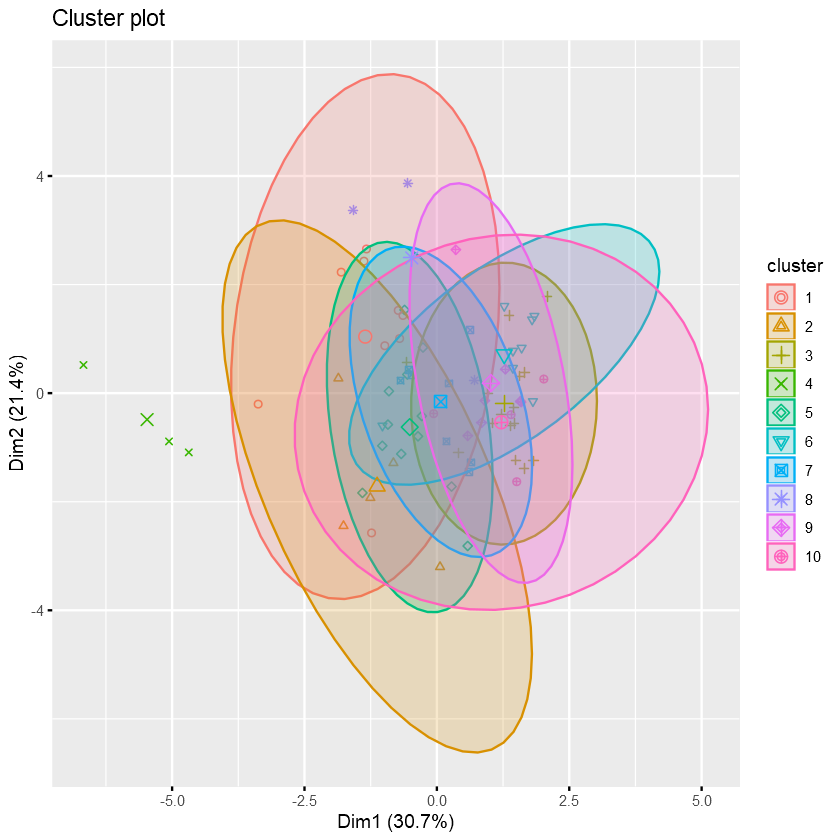

In [10]:
fviz_cluster(output, geom = "point", ellipse.type = "norm", data=df)

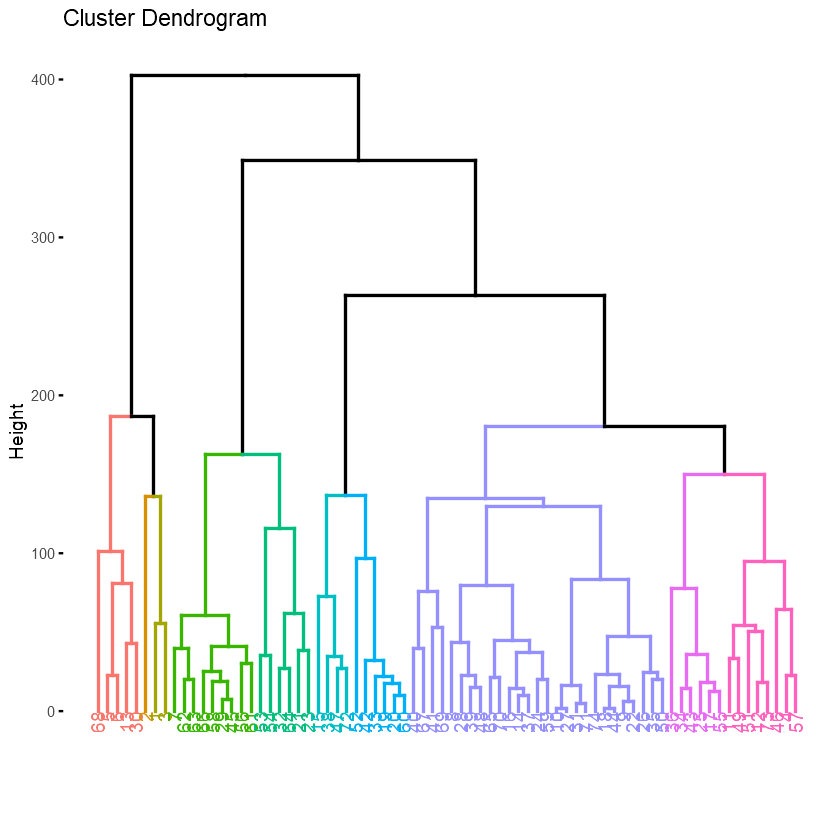

In [14]:
# Dendrogram
hc.cut <- hcut(df, k = 10, hc_method = "complete")
# Visualize dendrogram
fviz_dend(hc.cut, show_labels = TRUE, rect = FALSE)
# Visualize cluster
#fviz_cluster(hc.cut, ellipse.type = "convex")